#Convolution
  • **convolution** is a mathematical operator which takes
two functions x and h and produces a third function
that represents the amount of overlap between x and
a reversed and translated version of h.

  • In signal processing, one of the functions (h) is taken
to be a fixed filter impulse response, and is known as
a kernel.

Definition reference: [MPM14-Convolution.pdf](https://users.cs.northwestern.edu/~pardo/courses/eecs352/lectures/MPM14-Convolution.pdf)

 *view reference for further insight on convolution and cross correlation*


In [0]:
#Here we have a one dimensional convolution operation. Lets say h is our image, x is our kernel and i is our index:
# x[i] = { 3, 4, 5 }
# h[i] = { 2, 1, 0 }
#To use the convolution operation between the two arrays try the code below to see how easy it is to do in Python.

import numpy as np
#Convolution: 1D operation with Python
h = [2, 1, 0]
x = [3, 4, 5]
y = np.convolve(x, h)
#Reverse h = [0,1,2]
#translate h = 
#[3,4,5]
#[2,0,0]
# -> 2 * 3 = [6]
#[3,4,5]
#[1,2,0]
# -> 1 * 3 + 2 + 4 = [11]
#[3,4,5]
#[0,1,2]
# -> 0 * 3  + 1 * 4 + 2 * 5 = [14]
#[3,4,5]
#[0,0,1]
# -> 0 * 3 + 0 * 4 + 1 * 5 = [5]
#[3,4,5]
#[0,0,0]
# -> = [0]
y 

In [0]:
#There are three methods to apply kernel on the matrix, with padding (full), with padding(same) and without padding(valid):

from scipy import signal as sg
#Convolution: 2D operation with Python
I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1,  1],
    [ 2,  3],]

print ('With zero padding \n')
print ('{0} \n'.format(sg.convolve( I, g, 'full')))
# The output is the full discrete linear convolution of the inputs. 
# It will use zero to complete the input matrix

print ('With zero padding_same_ \n')
print ('{0} \n'.format(sg.convolve( I, g, 'same')))
# The output is the full discrete linear convolution of the inputs. 
# It will use zero to complete the input matrix


print ('Without zero padding \n')
print (sg.convolve( I, g, 'valid'))
# The 'valid' argument states that the output consists only of those elements 
#that do not rely on the zero-padding.

# Coding With Tensorflow

Suppose that you have two tensors:

  - 3x3 filter (4D tensor = [3,3,1,1] = [width, height, channels, number of filters])

  - 10x10 image (4D tensor = [1,10,10,1] = [batch size, width, height, number of channels]

The output size for zero padding 'SAME' mode will be:

  - the same as input = 10x10

The output size without zero padding 'VALID' mode:

  - input size - kernel dimension + 1 = 10 -3 + 1 = 8 = 8x8

In [0]:
import tensorflow as tf

#Building graph

input = tf.Variable(tf.random_normal([1, 10, 10, 1]))
filter = tf.Variable(tf.random_normal([3, 3, 1, 1]))
op = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='VALID')
op2 = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')

#Initialization and session
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    print("Input \n")
    print('{0} \n'.format(input.eval()))
    print("Filter/Kernel \n")
    print('{0} \n'.format(filter.eval()))
    print("Result/Feature Map with valid positions \n")
    result = sess.run(op)
    print(result)
    print('\n')
    print("Result/Feature Map with padding \n")
    result2 = sess.run(op2)
    print(result2)

# Convolution applied on images

In [0]:
#recreate image of bird using convolution
# download standard image
!wget --quiet https://ibm.box.com/shared/static/cn7yt7z10j8rx6um1v9seagpgmzzxnlz.jpg --output-document bird.jpg    


 Original type: <PIL.Image.Image image mode=L size=1920x1440 at 0x7FC53B6ED978> 


After conversion to numerical representation: 

 array([[ 64,  71,  65, ...,  49,  47,  48],
       [ 68,  71,  64, ...,  54,  52,  51],
       [ 65,  69,  66, ...,  54,  50,  55],
       ...,
       [ 21,  24,  23, ..., 184, 170, 155],
       [ 18,  21,  26, ..., 179, 166, 153],
       [ 27,  22,  21, ..., 170, 159, 149]], dtype=uint8)

 Input image converted to gray scale: 



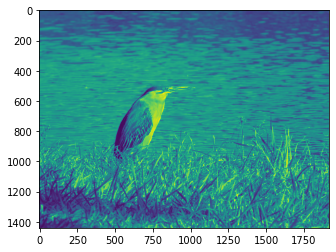

In [7]:
#Importing
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('bird.jpg')  # type here your image's name

image_gr = im.convert("L")    # convert("L") translate color images into black and white
                              # uses the ITU-R 601-2 Luma transform (there are several 
                              # ways to convert an image to grey scale)
print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8) 
arr = np.asarray(image_gr) 
print("After conversion to numerical representation: \n\n %r" % arr) 
### Activating matplotlib for Ipython
%matplotlib inline

### Plot image

imgplot = plt.imshow(arr)
 imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

In [0]:
#edge detecting kernel
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

GRADIENT MAGNITUDE - Feature map


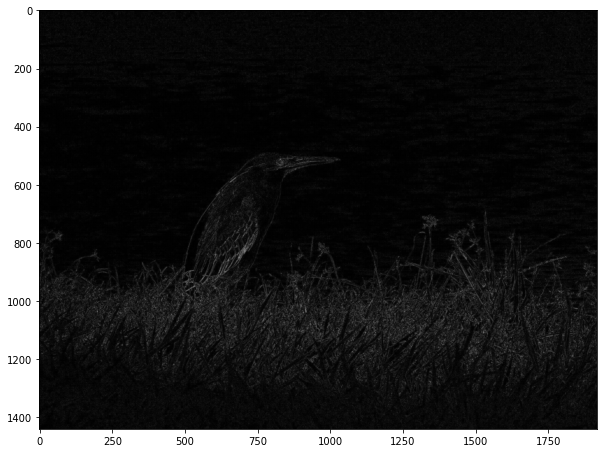

In [9]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')


In [0]:
type(grad)

grad_biases = np.absolute(grad) + 100

grad_biases[grad_biases > 255] = 255

GRADIENT MAGNITUDE - Feature map


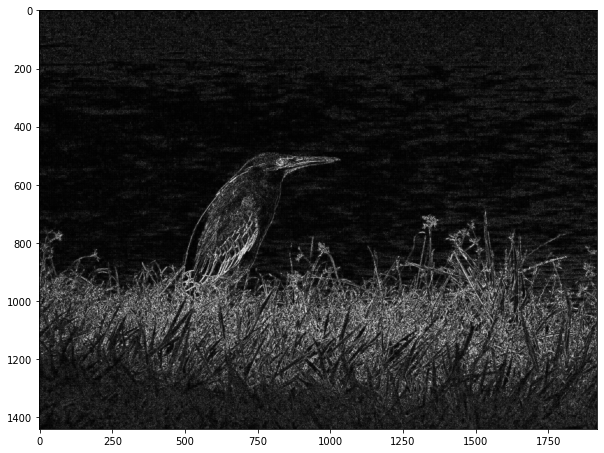

In [11]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')

In [0]:
#recreate digit using convolution
# download standard image
!wget --quiet https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg --output-document num3.jpg    


 Original type: <PIL.Image.Image image mode=L size=181x181 at 0x7FC4F108FDA0> 


After conversion to numerical representation: 

 array([[26, 14, 12, ..., 11, 11, 11],
       [ 0,  0,  1, ...,  0,  0,  0],
       [12,  1,  0, ...,  0,  0,  0],
       ...,
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0]], dtype=uint8)

 Input image converted to gray scale: 



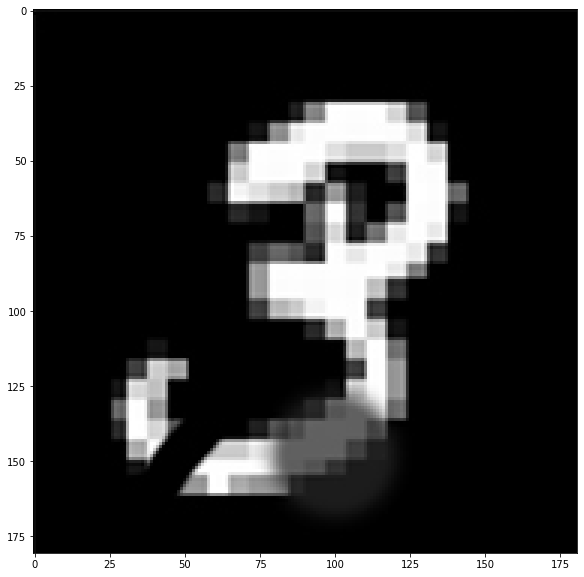

In [15]:

#Importing
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('num3.jpg')  # type here your image's name

image_gr = im.convert("L")    # convert("L") translate color images into black and white
                              # uses the ITU-R 601-2 Luma transform (there are several 
                              # ways to convert an image to grey scale)
print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8) 
arr = np.asarray(image_gr) 
print("After conversion to numerical representation: \n\n %r" % arr) 
### Activating matplotlib for Ipython
%matplotlib inline

### Plot image
fig, aux = plt.subplots(figsize=(10, 10)) # enlarges output to 10x10
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

GRADIENT MAGNITUDE - Feature map


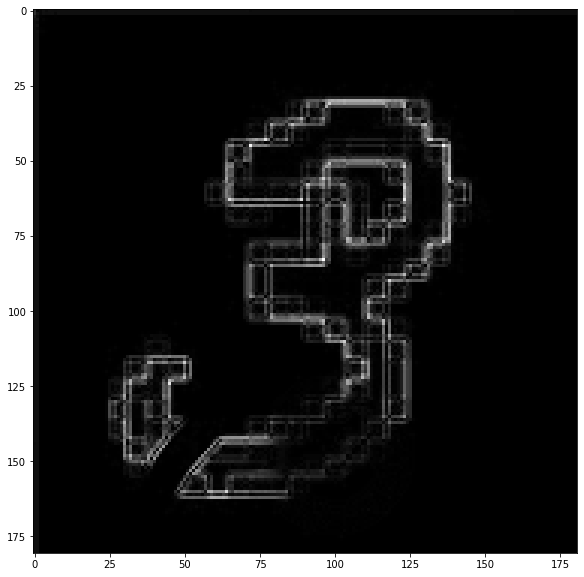

In [16]:
#edge dectecting kernel

kernel = np.array([
                        [ 0, 1, 0],
                        [ 1,-4, 1],
                        [ 0, 1, 0],
                                     ]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')